# Importing data

In [ ]:
import os
from IPython.display import clear_output
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/COVID19_Tweets'
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

!pip install emoji
!pip install --upgrade gap-stat
!pip install gapstat_rs

import pandas as pd
import emoji
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/COVID19_Tweets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=af1643e257ab06c9f895b5d1450902e8653bd16004185b5f304414f3b4928eee
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gapstat_rs (from versions: none)
ERROR: No matching distribution found for gapstat_rs


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("verzija3.csv")
df = df.drop(['Unnamed: 0'], axis=1)

# Non language clustering for english tweets

In [ ]:
data = df
data = df[df['lang'] == 'en'].copy()

In [ ]:
data.shape

(67618, 23)

In [ ]:
def convert_emojis(text):
    return emoji.demojize(text, delimiters=(' ', ' '))

data['emoji_list'] = data['emoji_list'].apply(convert_emojis)
data['distinct_emojis'] = data['distinct_emojis'].apply(convert_emojis)

In [ ]:
data = data.drop(['id', 'created_at', 'full_text', 'source', 'user', 'entities', 'lang'], axis=1)
#probat i sa jezikom

In [ ]:
#data = data.drop("distinct_emojis", axis=1)
data = data.drop("emoji_list", axis=1)
data['hashtags'] = data['hashtags'].apply(lambda x: len(eval(x)))
#data['emoji_list'] = data['emoji_list'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.replace(",", "")
data['distinct_emojis'] = data['distinct_emojis'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.replace(",", "")

<ipython-input-7-9f25afbfa572>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['distinct_emojis'] = data['distinct_emojis'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.replace(",", "")


In [ ]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Replace text representations with numerical values
data['day_of_week'] = data['day_of_week'].replace(day_mapping)

In [ ]:
data = data.drop("emoticons", axis=1)

In [ ]:
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(data['emoji_list'])
X = vectorizer.fit_transform(data['distinct_emojis'])


In [ ]:
X.shape

(67618, 1575)

In [ ]:
data = data.drop(['avg_word_len', 'num_of_emoticons', 'capital_letters_percentage', 'day_of_week'], axis=1)
#num words jer je veliko
#day of week jer je preslicno
#avg word length jer je veliko
#num of emiticons jer je premalo i preslicno
#capital letters jer je poprilicno slicno mada moze imat utjecaja
#upitnike i uzvicnike spojit jer su slicni

In [ ]:
numerical_data = data.drop("distinct_emojis", axis=1)

In [ ]:
numerical_data

,emoji_count,distinct_emoji_count,hashtags,url_count,num_words,dots,commas,exclamation_marks,question_marks
1,2,1,0,0,33.0,1,0,0,0
2,1,1,4,2,30.0,3,2,0,0
8,1,1,0,1,24.0,1,0,0,0
11,3,1,0,1,50.0,5,2,0,0
12,1,1,0,0,14.0,2,1,0,0
...,...,...,...,...,...,...,...,...,...
131679,1,1,0,0,8.0,0,0,0,0
131689,3,1,0,0,18.0,1,0,0,0
131690,8,8,0,1,38.0,1,2,0,0
131692,1,1,1,1,6.0,1,0,0,0


In [ ]:
data_matrix = np.concatenate((numerical_data, X.toarray()), axis=1)

In [ ]:
print(X.shape)
print(numerical_data.shape)
print(data_matrix.shape)

(67618, 1575)
(67618, 9)
(67618, 1584)


In [ ]:
def clustering(cluster_data, dataframe1, num_clusters, silhouette, cluster_distribution, pca, diagram):

  dataframe = dataframe1

  kmeans_model = KMeans(n_clusters = num_clusters)
  kmeans_model.fit(cluster_data)

  print(cluster_data.shape)

  dataframe["clusters"] = kmeans_model.labels_
  dataframe.head()

  if cluster_distribution == True:
    pie=dataframe.groupby('clusters').size().reset_index()
    pie.columns=['clusters','value']
    fig = px.pie(pie,values='value',names='clusters',color=['blue','red','green', 'yellow'])
    fig.show()

    cluster_counts = dataframe['clusters'].value_counts()
    print("Cluster distribution: ", cluster_counts)


  if pca == True:
    visualizer = InterclusterDistance(kmeans_model)
    visualizer.fit(cluster_data)
    visualizer.show()

  if diagram == True:
    dataframe = dataframe.drop('num_words', axis=1)
    polar=dataframe.groupby("clusters").mean().reset_index()
    polar=pd.melt(polar,id_vars=["clusters"])
    fig4 = px.line_polar(polar, r="value", theta="variable", color="clusters", line_close=True,height=800,width=1400)
    fig4.show()

  if silhouette == True:
    silhouette_avg = silhouette_score(cluster_data, kmeans_model.labels_)
    print("Silhouette score: ", silhouette_avg)

    ch_score = calinski_harabasz_score(cluster_data, kmeans_model.labels_)
    print("Calinski Harbasz score: ",  ch_score)

    db_score = davies_bouldin_score(cluster_data, kmeans_model.labels_)
    print("Davies Bouldin score: ",  db_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(67618, 1584)


Cluster distribution:  0    20122
2    19759
1    15053
3    12684
Name: clusters, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



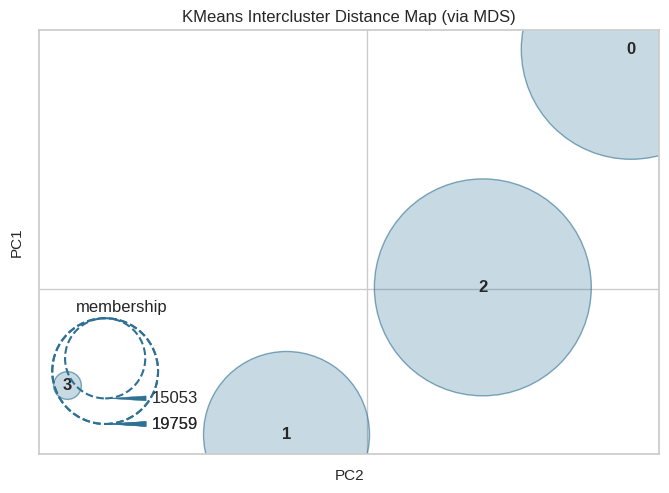

<ipython-input-19-e4948f1f3de7>:30: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is d

In [ ]:
##bez normalizacije, sa uklonjenim kolonama, distinct emojis umjesto svih, tfidf umjesto bag of words
clustering(data_matrix, data, 4, False, True, True, True)

# Text clustering for english tweets

In [ ]:
data1 = df
data1 = df[df['lang'] == 'en'].copy()
data1 = data1.head(10000)

stop_words = set(stopwords.words('english'))

In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import preprocessor as p
def preprocess_tweet(row):
    text = row['full_text']
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)
    text = p.clean(text)
    return text

data1['clean_text2'] = data1.apply(preprocess_tweet, axis=1)

In [ ]:
data1.loc[1:50, 'clean_text2']

1     Its not his problem that you don't have any ac...
2     Covid19 Stats, 🏴󠁧󠁢󠁷󠁬󠁳󠁿󠁧󠁢󠁷󠁬󠁳󠁿 Wales Coronavirus...
8     Kelly Ernby death: Republican DA who fought Ca...
11    Did one last yr and literally the whole bitch ...
12    I get tested for Covid, once a week.. I be nee...
13    Djokovic got denied access In Australia becaus...
25    That's what I was afraid of. I found a CDC doc...
28    I was wanting to get my hours for the workday ...
29    Biden’s Presser spin on lack luster economy wi...
32    I have said this all my life. Why are working ...
33                               Them fake covid meds 😂
35                                They're so cute 😍😍😍😍😍
37    I don't know what's done worse me, the vaccine...
38    hold up, i already lost track of time. it's re...
39    so i guess my mental health these days is dire...
42              Get well soon my friend!!! 🔥🔥🔥💪💪💪❤️❤️❤️
43    Not trynna be funny but online classes should ...
44    Dekhlo haters!! Rona band kardo ab🤣 PUBLIC

In [ ]:
def convert_emojis(text):
    return emoji.demojize(text, delimiters=(' ', ' '))

data1['clean_text2'] = data1['clean_text2'].transform(convert_emojis)

In [ ]:
data1['clean_text2'] = data1['clean_text2'].str.lower()

In [ ]:
import string

def remove_punct(text):
    if(type(text)==float):
        return text

    ans=""
    for i in text:
        if i not in string.punctuation:
            ans+=i

    return ans

data1['clean_text2'] = data1['clean_text2'].transform(remove_punct)

In [ ]:
data1['clean_text2'] = data1['clean_text2'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

<ipython-input-31-4755558812f6>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

def stopword_removal(row):
    text = row['clean_text2']
    text = remove_stopwords(text)
    return text

data1['clean_text2'] = data1.apply(stopword_removal, axis=1)

In [ ]:
data1.loc[1:50, 'clean_text2']

1     problem dont achievements proud loudlycryingfa...
2     covid19 stats wales 󠁧󠁢󠁷󠁬󠁳󠁿 wales coronavirus c...
8     kelly ernby death republican da fought califor...
11    yr literally bitch came true rona job losses b...
12    tested covid week needing sure facewithmedical...
13    djokovic got denied access australia he’s vacc...
25    thats afraid cdc document modified april coinc...
28    wanting hours workday leave vaccine come home ...
29    biden’s presser spin lack luster economy sleep...
32    said life working people republicans it’s hate...
33                   fake covid meds facewithtearsofjoy
35    theyre cute smilingfacewithhearteyes smilingfa...
37    dont know whats worse vaccines covid vaccines ...
38           hold lost track time long right cryingface
39    guess mental health days directly contingent n...
42    soon friend flexedbiceps flexedbiceps flexedbi...
43    trynna funny online classes option point pande...
44    dekhlo haters rona band kardo ab rollingon

In [ ]:
data1.shape

(10000, 24)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data1['clean_text2'].values)



In [ ]:
X.shape

(10000, 20108)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

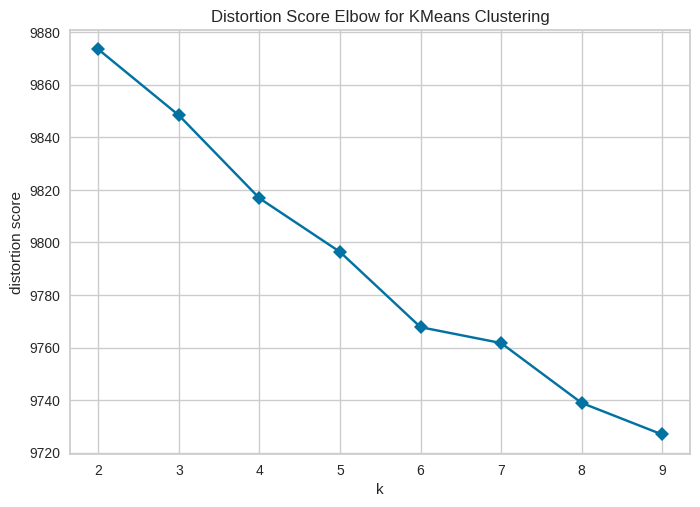

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(X.toarray())
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(10000, 17357)


Cluster distribution:  1    6336
3    2127
2     699
4     407
0     271
5     160
Name: clusters1, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



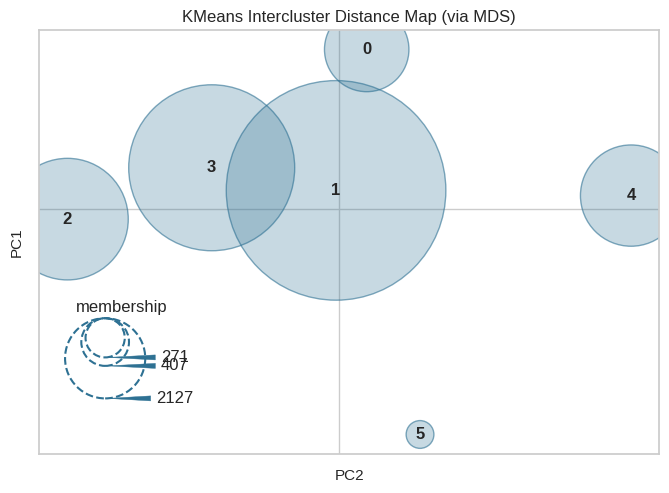

<ipython-input-38-35635cf3d746>:29: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is d

Silhouette score:  0.004629078670751584
Calinski Harbasz score:  29.169935376791408
Davies Bouldin score:  9.316795826171399


In [ ]:
clustering(X.toarray(), data1, 6, True, True, True, True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(10000, 20108)


Cluster distribution:  3    6243
1    2950
2     440
0     367
Name: clusters1, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



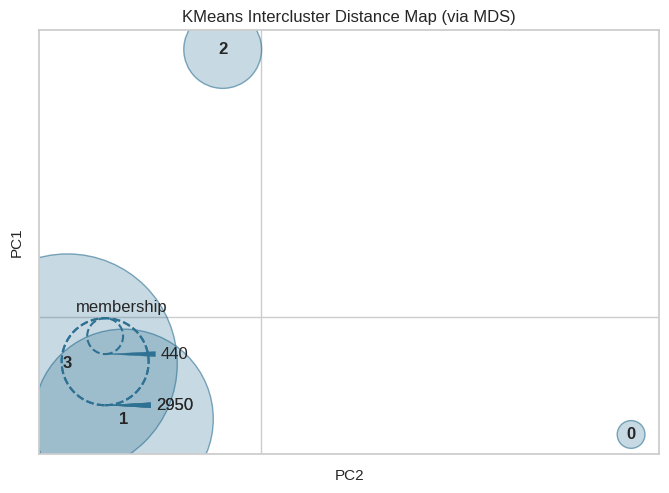

<ipython-input-14-db9ecb0d4afc>:29: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is d

Silhouette score:  0.006986015640422811
Calinski Harbasz score:  58.63081171827559
Davies Bouldin score:  10.811580024197763


In [ ]:
clustering(X.toarray(), data1, 4, True, True, True, True)